# Tasks 2020 
### [ Fundamentals of Data Analysis Module GMIT 2020 ]

<img align="left" width="300" height="300" src="https://www.wardyit.com/wp-content/uploads/data-analysis-fundamentals-using-excel.png">

Below are my solutions to the Task assessment.

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*
___

## Table of Contents
* [Task 1](#task1)
    * [Test of the function](#Test_of_the_function1)
* [Task 2](#task2)
    * [Test of the function](#Test_of_the_function2)
* [Task 3](#task3)
    * [Test of the function](#Test_of_the_function3)
* [Task 4](#task4)
    * [Test of the function](#Test_of_the_function4)
___

### __TASK 1__: *Dictionary of unique items with the number of appearance from a list.*  <a name="task1"></a>

For completion of this task I will iterate over the list checking on unique items as keys and then count and store the corresponding number of times each item appears as values in the dictionary. [1]

> 1. https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

In [1]:
def counts(l):
    """
    Function that takes a list as an input and returns a dictionary of unique items with the number of appearance
    """
    # Creating an empty dictionary
    dic = {}
    # Loop through items in the list
    for i in l:
        # Checking if items are in the dictionary
        if i in dic:
            # Count the number of times each item appears
            dic[i] += 1
        else:
            dic[i] = 1
    # Output the dictionary
    return dic

<br>

##### Test of the function <a name="Test_of_the_function1"></a>
Here is a test of the above function with the proposed in the task list ['A', 'A', 'B', 'C', 'A']

In [2]:
counts(['A', 'A', 'B', 'C', 'A'])

{'A': 3, 'B': 1, 'C': 1}

<br>

***
### __TASK 2__: *Dice roll simulation*  <a name="task2"></a>

<img align="left" width="230" height="90" src="https://i.pinimg.com/originals/cd/18/f1/cd18f1c40c148545b66e9f6a851c98d2.jpg">

In order to simulate a randomly rolling $k$ dice $n$ number of times I will be using a function from $python.random$ called $randint$ that returns a random integer within a given range (in this cases dice sides) [1]. Alongside with randint I will be using the $sum$ function within the range of given parameter $k$. [2]

To keep track of each total face value I will incorporate a function $counts$ from Task 1.

> 1. [Python: random.randint](https://docs.python.org/3/library/random.html)
2. [Stackoverflow: How to sum up values of a for range function in python](https://stackoverflow.com/questions/43528962/how-to-sum-up-values-of-a-for-range-function-in-python)

#### General setup

In [3]:
# For generating random numbers
import random 
# Package for plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

In [4]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Paired", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (13, 9)

<br>

#### Dice simulation function 

In [5]:
def dicerolls(k, n):
    """
    Function that simulates randomly rolling k dice n times
    and keeps track of each total face value
    """
    # Initialize the list of rolls
    rolls = []
    # Loop through the number of times the dice is rolled
    for i in range(n):
        # Choose randomly a number between 1 and 6, inclusively, within k range:
        dice = sum(random.randint(1, 6) for j in range(k))
        # Add to list of rolls
        rolls.append(dice)
    # Sort the list in ascending order. 
    rolls = sorted(rolls)
    # Call a function counts from task 1
    output = counts(rolls)
    return output

<br>

#### Test of the function <a name="Test_of_the_function2"></a>
Here is a test of the above function where k number of dices is rolled n number of times

In [6]:
dicerolls(2,1000)

{2: 29,
 3: 58,
 4: 83,
 5: 123,
 6: 145,
 7: 166,
 8: 126,
 9: 111,
 10: 87,
 11: 47,
 12: 25}

<br>

#### Plot the output by rolling a diffent number of dice. 

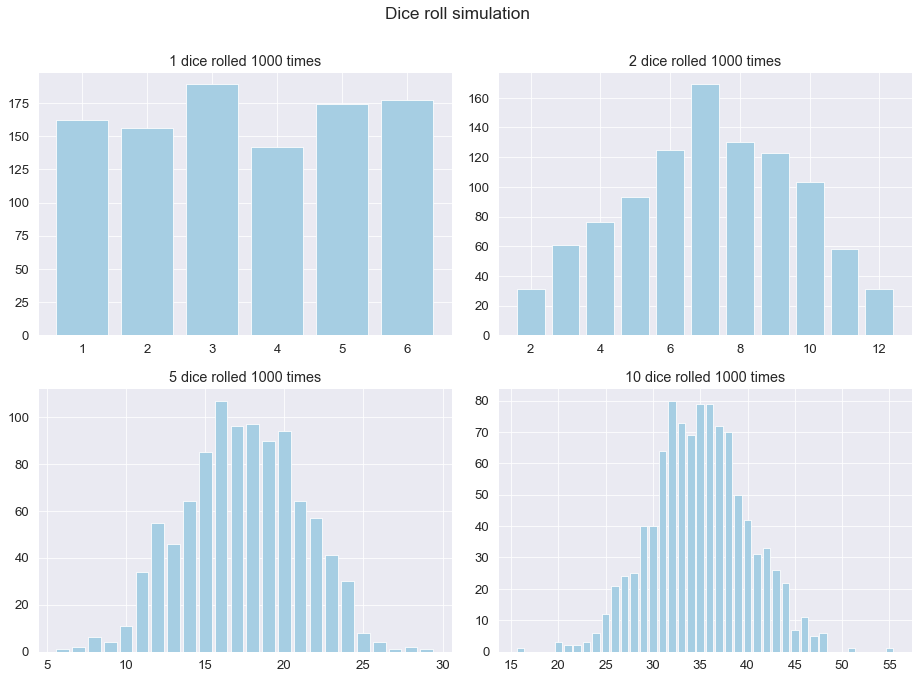

In [7]:
# Build 2x2 plots.
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, sharey=False)
fig.suptitle("Dice roll simulation ", y=1.05)

# Roll 1 Dice.
k1 = 1
n1 = 1000
d = dicerolls(k1, n1)

# Build a plot (by separating keys and values)
ax1.bar(d.keys(), d.values())
ax1.set_title(f"{k1} dice rolled {n1} times")

#  2 Dice.
k2 = 2
n2 = 1000
d = dicerolls(k2, n2)
# Build a plot.
ax2.bar(d.keys(), d.values())
ax2.set_title(f"{k2} dice rolled {n2} times")

# 5 Dice.
k3 = 5
n3 = 1000
d = dicerolls(k3, n3)
# Build a plot.
ax3.bar(d.keys(), d.values())
ax3.set_title(f"{k3} dice rolled {n3} times")

# 10 Dice.
k4 = 10
n4 = 1000
d = dicerolls(k4, n4)
# Build a plot.
ax4.bar(d.keys(), d.values())
ax4.set_title(f"{k4} dice rolled {n4} times")

# Clean up whitespace padding.
fig.tight_layout()

# Display plot.
plt.show()

***
#### Conclusion on the above plots

It can be seen that the graphs approach a normal distribution as the number of dice rolled is increased.

<br>

***
### __TASK 2__: *Flip a coin simulation*  <a name="task3"></a>

<br>

<img align="left" width="200" height="60" src="https://www.flaticon.com/svg/static/icons/svg/1715/1715539.svg">

<br>

For simulation of a flipping a coin 100 times with a 50/50 chance of heads or tails I will be using a function [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) from [NumPy](https://numpy.org/) library. This function draws samples from a binomial distribution that has two possible outcomes: "success" or "failure", or in this case "heads" or "tails". [1]

The function takes three parameters:
* _n_ - a number of times coin is flipped,
* _p_ - probability of getting heads or tails,
* _size_ - a number of times we run the test. 

> 1. [Statistics How To: Binomial Distribution](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/)

#### General setup

In [8]:
# Numpy to use numpy.random.binomial function
import numpy as np

<br>

#### Flipping a coin simulation. 

In [9]:
# Flip a coin 100 times with a probability 0.5 of each trial tested 1000 times. 
n, p, size = 100, 0.5, 1000

# Draw the samples.
x = np.random.binomial(n, p, size)

# Display the number of heads.
x

array([43, 52, 54, 52, 56, 55, 49, 44, 54, 54, 56, 49, 50, 45, 50, 51, 55,
       46, 52, 52, 44, 60, 50, 46, 53, 54, 48, 49, 57, 41, 44, 43, 47, 39,
       52, 51, 44, 57, 53, 50, 43, 45, 44, 48, 46, 53, 46, 56, 41, 48, 49,
       47, 53, 50, 47, 52, 52, 47, 47, 49, 49, 50, 44, 48, 49, 45, 47, 56,
       49, 53, 38, 55, 56, 42, 55, 48, 53, 54, 50, 54, 56, 56, 43, 47, 41,
       49, 43, 60, 46, 52, 55, 51, 48, 54, 51, 46, 46, 50, 43, 51, 55, 50,
       46, 58, 51, 47, 47, 53, 52, 51, 53, 49, 41, 51, 52, 53, 55, 49, 48,
       48, 54, 51, 51, 47, 59, 46, 45, 52, 57, 43, 46, 48, 54, 50, 47, 42,
       55, 53, 51, 52, 55, 52, 53, 58, 53, 40, 52, 47, 51, 51, 52, 47, 44,
       42, 53, 51, 52, 53, 49, 51, 55, 50, 58, 48, 52, 57, 52, 56, 54, 50,
       49, 37, 51, 51, 51, 42, 50, 51, 50, 56, 53, 53, 45, 50, 52, 56, 49,
       57, 57, 57, 59, 53, 51, 51, 37, 61, 44, 56, 52, 48, 50, 52, 52, 49,
       44, 47, 53, 42, 51, 52, 52, 46, 44, 41, 56, 47, 51, 53, 43, 59, 45,
       44, 51, 52, 45, 48

<br>

#### Plot the output of flipping a coin 100 times.

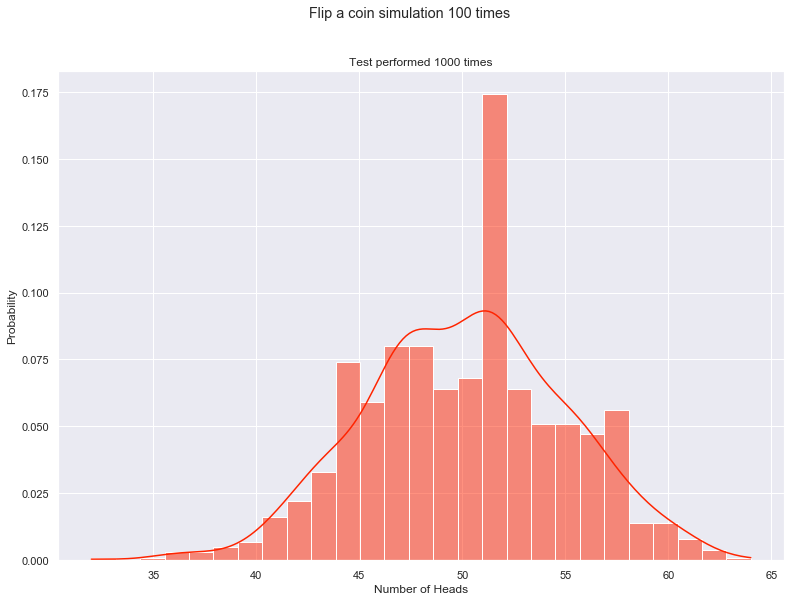

In [10]:
# Colour scheme for the plot.
sns.set_theme(palette="autumn")

# Plot the array.
fig, ax = plt.subplots()
fig.suptitle("Flip a coin simulation 100 times")

sns.histplot(x, stat="probability", kde=True, ax=ax).set_title("Test performed 1000 times")
ax.set_xlabel("Number of Heads")

# Show the plot.
plt.show()

***
#### Conclusion on the above plot

The plot of flip a coin simulator roughly follows a bell-shaped curve.